# Web cut

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [2]:
# Load the data using pandas
data = pd.read_csv('../data/cut_web.csv')
data = data.head(-100) # remove last experiment
data.head(10)

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50,c_phi,c_rho
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,1.221730,463.681714
1,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,1.225256,463.680524
2,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,1.228782,463.678661
3,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,1.232308,463.708276
4,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,1.235834,463.736364
5,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,1.239360,463.753995
6,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,1.242886,463.795277
7,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,1.246412,463.832735
8,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,1.249938,463.881185
9,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,1.253464,463.918497


In [3]:
from cut_predictor import CutPredictor

reg = CutPredictor(
    data = data,
    process_parameters = [
        'Blechdicke', 
        'Niederhalterkraft', 
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    categorical = [
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    position = 'c_phi',
    output = 'c_rho',
    angle=True,
)
reg.data_summary()

Data summary
------------------------------------------------------------

Process parameters:
	- Blechdicke : numerical [ 0.99  ...  1.48 ]
	- Niederhalterkraft : numerical [ 10.0  ...  500.0 ]
	- Ziehspalt : categorical [1.6, 2.4]
	- Einlegeposition : categorical [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
	- Ziehtiefe : categorical [30, 50, 70]
Position variable:
	- c_phi : numerical, [ 1.2217304763960306 / 1.5707963267948966 ]
Output variable:
	- c_rho : numerical, [ 462.8938277335998 / 465.1706438896841 ]

Inputs
------------------------------------------------------------

       Blechdicke  Niederhalterkraft  Ziehspalt  Einlegeposition  Ziehtiefe  \
0            1.01                410        2.4               -5         30   
1            1.01                410        2.4               -5         30   
2            1.01                410        2.4               -5         30   
3            1.01                410        2.4               -5         30   
4            1.01       

In [6]:
best_config = reg.autotune(
    save_path='best_web_model',
    trials=100,
    max_epochs=100, 
    layers=[2, 4],
    neurons=[64, 256, 64],
    dropout=[0.0, 0.5, 0.1],
    learning_rate=[1e-5, 1e-3]
)

[I 2022-04-25 10:53:59,507] A new study created in memory with name: no-name-bfd3f28b-b331-40e2-afd6-a37b2dbe2854


INFO:tensorflow:Assets written to: best_web_model/assets


[I 2022-04-25 10:54:13,471] Trial 0 finished with value: 0.005053950473666191 and parameters: {'nb_layers': 4, 'n_units_l0': 192, 'n_units_l1': 256, 'n_units_l2': 192, 'n_units_l3': 256, 'learning_rate': 0.00014289000788430268, 'dropout': 0.0}. Best is trial 0 with value: 0.005053950473666191.
[I 2022-04-25 10:54:29,783] Trial 1 finished with value: 0.005094815511256456 and parameters: {'nb_layers': 4, 'n_units_l0': 256, 'n_units_l1': 128, 'n_units_l2': 128, 'n_units_l3': 256, 'learning_rate': 0.0002584060925654785, 'dropout': 0.1}. Best is trial 0 with value: 0.005053950473666191.
[I 2022-04-25 10:54:41,329] Trial 2 finished with value: 0.007710627745836973 and parameters: {'nb_layers': 2, 'n_units_l0': 64, 'n_units_l1': 192, 'learning_rate': 0.0003112029103943226, 'dropout': 0.30000000000000004}. Best is trial 0 with value: 0.005053950473666191.
[I 2022-04-25 10:54:52,392] Trial 3 finished with value: 0.008851819671690464 and parameters: {'nb_layers': 2, 'n_units_l0': 64, 'n_units_l1

INFO:tensorflow:Assets written to: best_web_model/assets


[I 2022-04-25 10:57:05,230] Trial 13 finished with value: 0.004756609443575144 and parameters: {'nb_layers': 4, 'n_units_l0': 256, 'n_units_l1': 128, 'n_units_l2': 256, 'n_units_l3': 192, 'learning_rate': 0.00024645645836713845, 'dropout': 0.0}. Best is trial 13 with value: 0.004756609443575144.
[I 2022-04-25 10:57:18,749] Trial 14 finished with value: 0.006162920966744423 and parameters: {'nb_layers': 4, 'n_units_l0': 192, 'n_units_l1': 192, 'n_units_l2': 256, 'n_units_l3': 192, 'learning_rate': 0.0008200361294630023, 'dropout': 0.0}. Best is trial 13 with value: 0.004756609443575144.
[I 2022-04-25 10:57:32,481] Trial 15 finished with value: 0.007619432173669338 and parameters: {'nb_layers': 3, 'n_units_l0': 256, 'n_units_l1': 128, 'n_units_l2': 256, 'learning_rate': 0.00018828584179539804, 'dropout': 0.2}. Best is trial 13 with value: 0.004756609443575144.
[I 2022-04-25 10:57:45,555] Trial 16 finished with value: 0.004762204829603434 and parameters: {'nb_layers': 4, 'n_units_l0': 192

INFO:tensorflow:Assets written to: best_web_model/assets


[I 2022-04-25 10:58:27,398] Trial 19 finished with value: 0.004654190503060818 and parameters: {'nb_layers': 4, 'n_units_l0': 256, 'n_units_l1': 64, 'n_units_l2': 256, 'n_units_l3': 64, 'learning_rate': 0.0004900112069836824, 'dropout': 0.1}. Best is trial 19 with value: 0.004654190503060818.
[I 2022-04-25 10:58:40,735] Trial 20 finished with value: 0.005339618306607008 and parameters: {'nb_layers': 3, 'n_units_l0': 256, 'n_units_l1': 64, 'n_units_l2': 256, 'learning_rate': 0.00045860072079812505, 'dropout': 0.1}. Best is trial 19 with value: 0.004654190503060818.
[I 2022-04-25 10:58:52,577] Trial 21 finished with value: 0.005335868336260319 and parameters: {'nb_layers': 4, 'n_units_l0': 256, 'n_units_l1': 64, 'n_units_l2': 256, 'n_units_l3': 64, 'learning_rate': 0.000571114504952237, 'dropout': 0.0}. Best is trial 19 with value: 0.004654190503060818.
[I 2022-04-25 10:59:07,550] Trial 22 finished with value: 0.005788558162748814 and parameters: {'nb_layers': 4, 'n_units_l0': 192, 'n_un

INFO:tensorflow:Assets written to: best_web_model/assets


[I 2022-04-25 11:04:16,870] Trial 46 finished with value: 0.004596188198775053 and parameters: {'nb_layers': 3, 'n_units_l0': 128, 'n_units_l1': 64, 'n_units_l2': 256, 'learning_rate': 0.0007167101341867319, 'dropout': 0.1}. Best is trial 46 with value: 0.004596188198775053.
[I 2022-04-25 11:04:31,894] Trial 47 finished with value: 0.005762382410466671 and parameters: {'nb_layers': 4, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 256, 'n_units_l3': 64, 'learning_rate': 0.0007463127049588148, 'dropout': 0.2}. Best is trial 46 with value: 0.004596188198775053.
[I 2022-04-25 11:04:48,106] Trial 48 finished with value: 0.005212878808379173 and parameters: {'nb_layers': 4, 'n_units_l0': 256, 'n_units_l1': 64, 'n_units_l2': 256, 'n_units_l3': 192, 'learning_rate': 0.000706471064361944, 'dropout': 0.1}. Best is trial 46 with value: 0.004596188198775053.
[I 2022-04-25 11:04:59,926] Trial 49 finished with value: 0.007324611768126488 and parameters: {'nb_layers': 2, 'n_units_l0': 192, 'n_u

INFO:tensorflow:Assets written to: best_web_model/assets


[I 2022-04-25 11:06:31,053] Trial 56 finished with value: 0.004420994780957699 and parameters: {'nb_layers': 3, 'n_units_l0': 128, 'n_units_l1': 128, 'n_units_l2': 256, 'learning_rate': 0.00039156074451423764, 'dropout': 0.1}. Best is trial 56 with value: 0.004420994780957699.
[I 2022-04-25 11:06:47,189] Trial 57 finished with value: 0.00797053799033165 and parameters: {'nb_layers': 4, 'n_units_l0': 256, 'n_units_l1': 128, 'n_units_l2': 256, 'n_units_l3': 128, 'learning_rate': 0.000435018316957987, 'dropout': 0.2}. Best is trial 56 with value: 0.004420994780957699.
[I 2022-04-25 11:07:02,960] Trial 58 finished with value: 0.005188195034861565 and parameters: {'nb_layers': 4, 'n_units_l0': 128, 'n_units_l1': 192, 'n_units_l2': 256, 'n_units_l3': 64, 'learning_rate': 0.0008780570849238392, 'dropout': 0.2}. Best is trial 56 with value: 0.004420994780957699.
[I 2022-04-25 11:07:17,133] Trial 59 finished with value: 0.004424641374498606 and parameters: {'nb_layers': 3, 'n_units_l0': 256, 'n

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5120      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                         

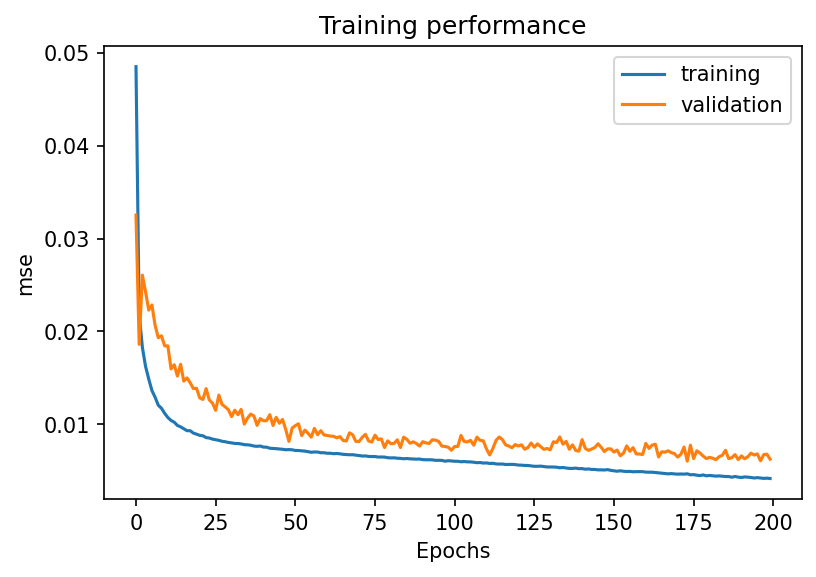

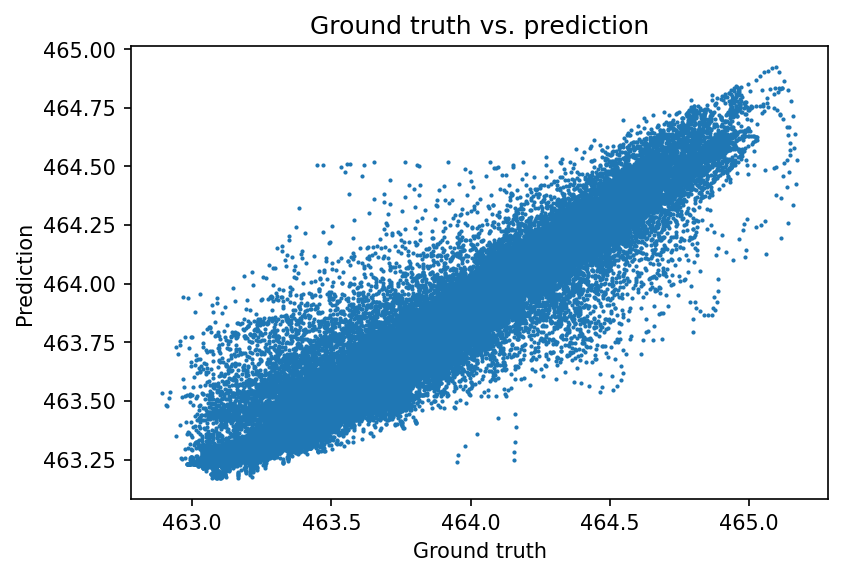

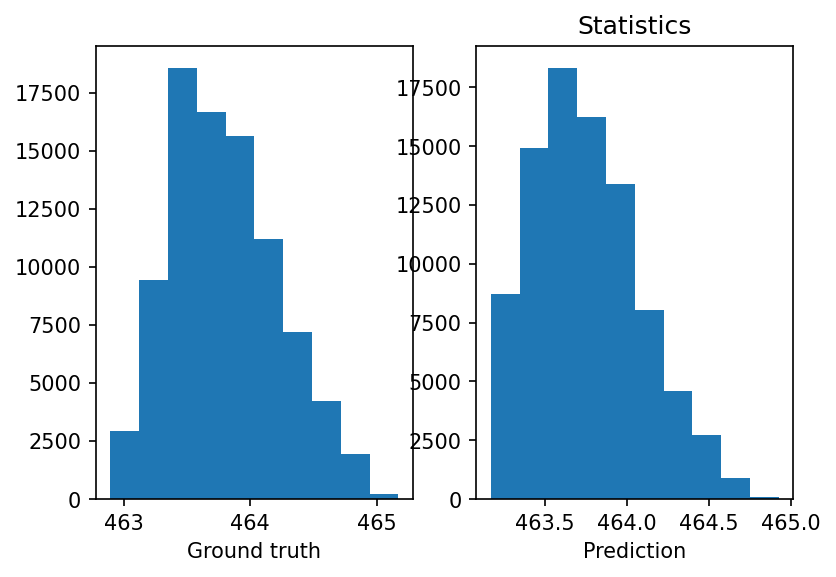

In [4]:
config = {
    'batch_size': 4096,
    'max_epochs': 200,
    'layers': [256, 256, 128],
    'dropout': 0.3,
    'learning_rate': 0.001
}

# or best_config from autotune if you already did it once

reg.custom_model(save_path='best_web_model', config=config, verbose=True)
reg.training_summary()

Doe_ID 274


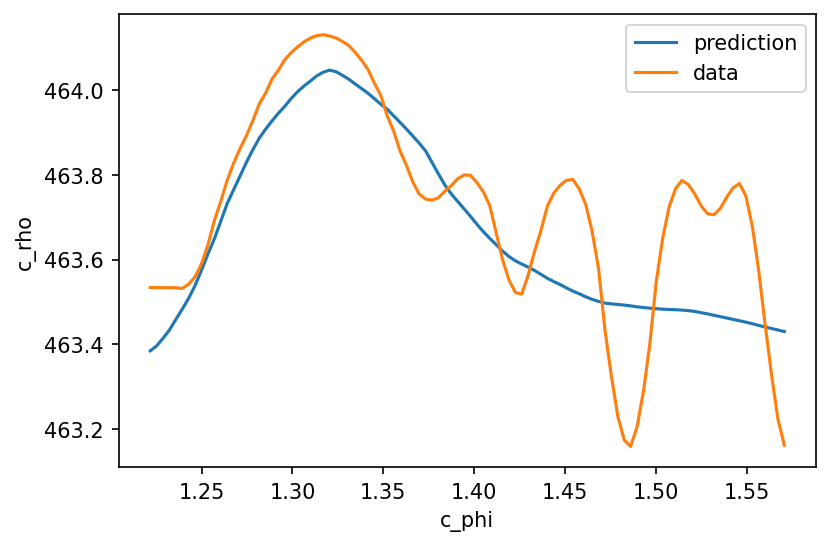

In [25]:
idx = np.random.choice(878)
print("Doe_ID", idx+1)
reg.compare(idx*100, (idx+1)*100)

In [6]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
reg.interactive()

interactive(children=(Dropdown(description='Material_ID', options=(1, 2, 3, 4, 5, 6), value=1), FloatSlider(va…